In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base_dir = "/media/hdd01/sklee/"
cell_type = "CA1"
experiment = "clust4-60"
T_train = 60 * 1000 * 5
T_test = 10 * 1000 * 5
sub_no = 6

In [4]:
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
V_ref = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:50000].flatten()[T_train:T_train+T_test]
V_spike_pred = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/alpha_rootspike_sub6_output.npz")["test"]
V_pred = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/alpha_sub6_output.npz")["test"]

S_ref = np.load(base_dir+cell_type+"_"+experiment+"/data/spk_loc.npy").flatten()[T_train:T_train+T_test]
S_pred = np.load(base_dir+cell_type+"_"+experiment+"/alpha_rootspike_sub6_output.npz")["spikes"]
S_prob = np.load(base_dir+cell_type+"_"+experiment+"/alpha_rootspike_sub6_output.npz")["probs"]

inputs = np.load(base_dir+cell_type+"_"+experiment+"/data/"+"Espikes_neural.npy")

Text(0, 0.5, 'Input Synapse')

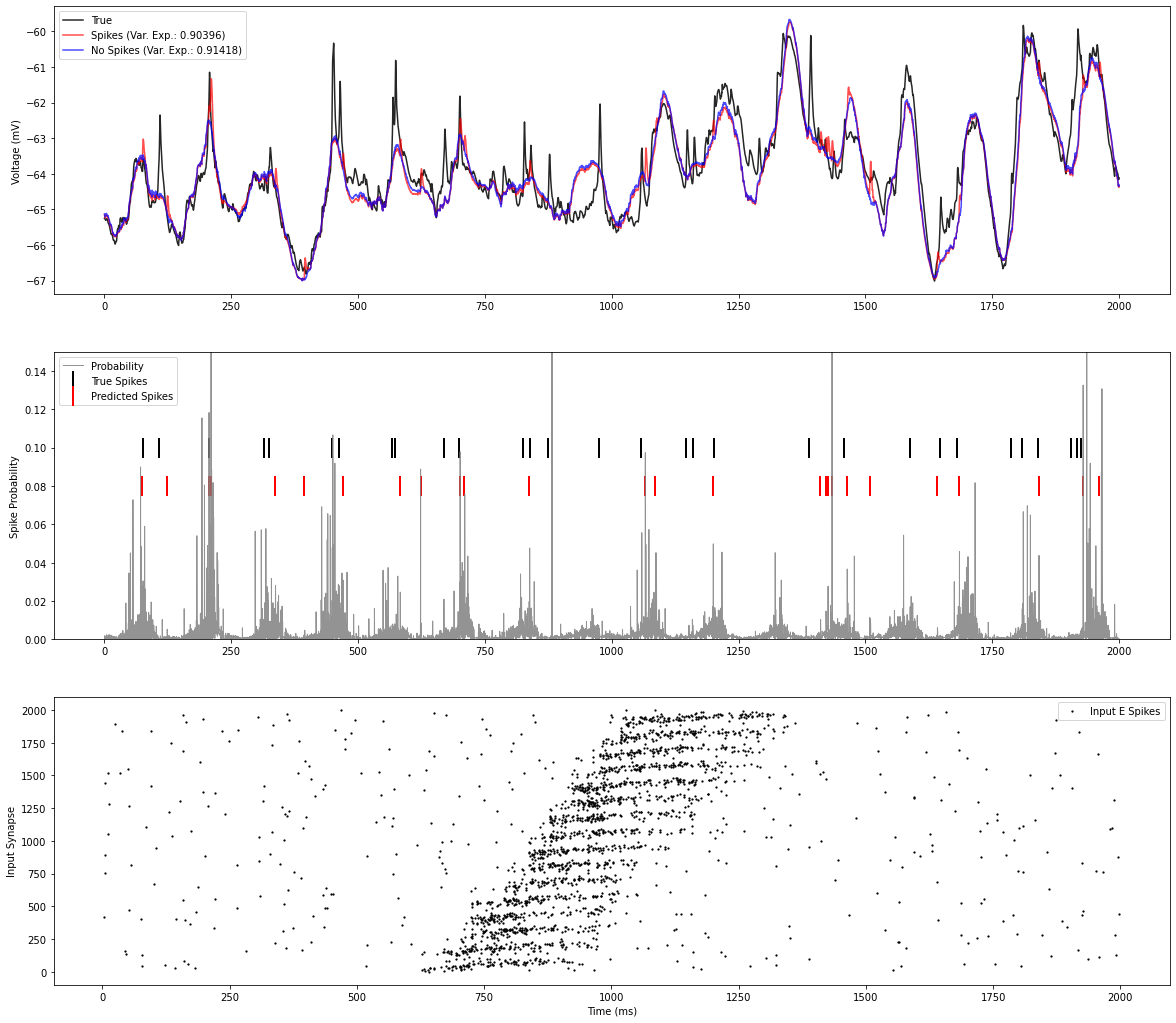

In [12]:
fig, axs = plt.subplots(nrows=3, figsize = (20,18))
x = np.arange(0,2000,0.2)
axs[0].plot(x, V_ref[16000:26000], c="black", alpha=0.85, label="True")
axs[0].plot(x, V_spike_pred[16000:26000], c="red", alpha=0.7, label="Spikes (Var. Exp.: 0.90396)")
axs[0].plot(x, V_pred[16000:26000], c="blue", alpha=0.7, label="No Spikes (Var. Exp.: 0.91418)")

axs[0].legend()
axs[0].set_ylabel("Voltage (mV)")


axs[1].plot(x, S_prob[16000:26000], alpha=0.85, linewidth=1, c="gray", label="Probability")
axs[1].scatter(x, S_ref[16000:26000]-0.9, c="black", alpha=1, marker="|", s=400, label="True Spikes", linewidth=2)
axs[1].scatter(x, S_pred[16000:26000]*0.98-0.9, c="red", alpha=1, marker="|", s=400, label="Predicted Spikes", linewidth=2)
axs[1].legend()

axs[1].set_ylim(0,0.15)
axs[1].set_ylabel("Spike Probability")

x_idx = np.where(inputs[16000:26000] == 1)[1]
y_idx = np.where(inputs[16000:26000] == 1)[0]/5
axs[2].scatter(x_idx, y_idx, c="black", s=1.5, label="Input E Spikes")
axs[2].legend()
axs[2].set_xlabel("Time (ms)")
axs[2].set_ylabel("Input Synapse")

plt.savefig(base_dir+cell_type+"_"+experiment+"/rootspike_output.png", bbox_inches='tight', dpi=200, facecolor='w')
plt.close()

In [5]:
filters = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/alpha_rootspike_sub6_output.npz")["filters"][2*sub_no:]
print(filters.shape)

(14, 500)


In [6]:
fig, axs = plt.subplots(nrows=sub_no+1, ncols=2, figsize = (20,20))
x = np.arange(0,40,0.2)

for i in range(sub_no):
    axs[i,0].plot(x, filters[i*2,:200], color="blue")
    axs[i,0].hlines(y=0,xmin=0,xmax=40, linewidth=1, color="gray", linestyle="--", alpha=0.8)
    axs[i,0].set_title("Excitatory Filter Subunit " +str(i))
    axs[i,0].set_xticks([])
    axs[i,1].plot(x, filters[i*2+1,:200], color="red")
    axs[i,1].hlines(y=0,xmin=0,xmax=40, linewidth=1, color="gray", linestyle="--", alpha=0.8)
    axs[i,1].set_title("Inhibitory Filter Subunit " +str(i))
    axs[i,1].set_xticks([])

axs[sub_no,0].plot(x, filters[-2,:200], color="green")
axs[sub_no,1].plot(x, filters[-1,:200], color="orange")
axs[sub_no,0].hlines(y=0,xmin=0,xmax=40, linewidth=1, color="gray", linestyle="--", alpha=0.8)
axs[sub_no,1].hlines(y=0,xmin=0,xmax=40, linewidth=1, color="gray", linestyle="--", alpha=0.8)
axs[sub_no,0].set_title("Root Subunit Spike Shape Filter")
axs[sub_no,1].set_title("Root Subunit Spike History Filter")
axs[sub_no,0].set_xlabel("Time (ms)")
axs[sub_no,1].set_xlabel("Time (ms)")

plt.savefig(base_dir+cell_type+"_"+experiment+"/rootspike_filters.png", bbox_inches='tight', dpi=200, facecolor='w')
plt.close()

In [9]:
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
V_ref = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:50000].flatten()[T_train:T_train+T_test]
V_spike_pred = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/alpha_rootspike_sub6_output.npz")["test"]
V_pred = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/alpha_sub6_output.npz")["test"]

In [38]:
min_val = int(np.min(V_ref))
max_val = int(np.max(V_ref)+1)

bin_factor = 4

print(min_val, max_val)

mean_array = np.empty(((max_val - min_val - 1)*4, 3))
std_array = np.empty(((max_val - min_val - 1)*4, 3))
for i in range((max_val - min_val - 1)*4):
    val = i/4+min_val
    
    nospike_mean = np.mean(V_pred[(V_ref >= val) & (V_ref < val+1/4)])
    spike_mean = np.mean(V_spike_pred[(V_ref >= val) & (V_ref < val+1/4)])
    nospike_std = np.std(V_pred[(V_ref >= val) & (V_ref < val+1/4)])
    spike_std = np.std(V_spike_pred[(V_ref >= val) & (V_ref < val+1/4)])
    
    mean_array[i,1] = nospike_mean
    mean_array[i,2] = spike_mean
    std_array[i,1] = nospike_std
    std_array[i,2] = spike_std
    mean_array[i,0] = val+1/(2*bin_factor)
    std_array[i,0] = val+1/(2*bin_factor)

-68 -58


/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


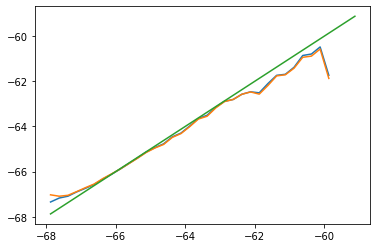

In [43]:
plt.plot(mean_array[:,0], mean_array[:,1])
plt.plot(mean_array[:,0], mean_array[:,2])
plt.plot(mean_array[:,0], mean_array[:,0])

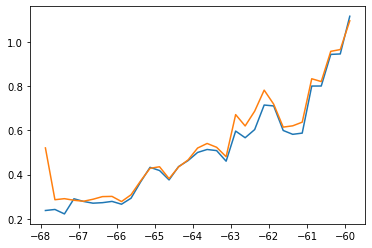

In [42]:
plt.plot(mean_array[:,0], std_array[:,1])
plt.plot(mean_array[:,0], std_array[:,2])